### Lets import the libraries

In [2]:
import pandas as pd
import numpy as np

### Lets Get the Data

In [3]:
data = pd.read_csv("bank-full.csv",sep=";")

In [4]:
df = data.copy()

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Lets understand the Data

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(10), object(7)
memory usage: 5.9+ MB


In [48]:
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.444162,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,0.000000,448.000000,0.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [49]:
df.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [50]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Further processing the data

In [6]:
df[["default",'housing',"loan"]]

,default,housing,loan
0,no,yes,no
1,no,yes,no
2,no,yes,yes
3,no,yes,no
4,no,no,no
...,...,...,...
45206,no,no,no
45207,no,no,no
45208,no,no,no
45209,no,no,no


In [7]:
# why we are simply not replacing all the no by 0 and yes by 1 is because
# we have yes as an alarming value for default and loan but no is alarming for housing

df["default"] = df["default"].replace("no",0)
df["default"] = df["default"].replace("yes",1)


In [8]:
df['housing'] = df["housing"].replace("no",1)
df["housing"] = df["housing"].replace('yes',0)


In [9]:
df["loan"] = df["loan"].replace("no",0)
df["loan"] = df["loan"].replace("yes",1)


In [10]:
df["housing"].value_counts()

housing
0    25130
1    20081
Name: count, dtype: int64

In [11]:
df["loan"].value_counts()


loan
0    37967
1     7244
Name: count, dtype: int64

In [12]:
df["default"].value_counts()

default
0    44396
1      815
Name: count, dtype: int64

In [13]:
# Using get dummies just to check the categorical columns identified
# by the python not for actually encoding which will be done by
# OneHotEncoding library sklearn.preprocessing

aply = list(pd.get_dummies(df.iloc[:,:-1]).columns)
# removing y because that is the output

In [51]:
aply

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [14]:
name_set = set()
for name in aply:
    if "_" in name:
        name_set.add(name.split("_")[0])

In [15]:
name_set
# these are the categorical columns that we need to OneHotEncode.

{'contact', 'education', 'job', 'marital', 'month', 'poutcome'}

In [16]:
cat_cols = list(name_set)

From exploring the data these also seems like categorical

In [17]:
for cats in ["housing","loan","default"]:
    cat_cols.append(cats)

In [18]:
cat_cols

['job',
 'poutcome',
 'education',
 'month',
 'contact',
 'marital',
 'housing',
 'loan',
 'default']

In [19]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [20]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,0,2143,0,0,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,0,29,0,0,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,0,2,0,1,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,0,1506,0,0,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,0,1,1,0,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,1,0,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,0,1729,1,0,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,0,5715,1,0,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,0,668,1,0,telephone,17,nov,508,4,-1,0,unknown


In [21]:
y = y.replace("no",0)
y = y.replace('yes',1)

In [22]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [23]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,0,2143,0,0,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,0,29,0,0,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,0,2,0,1,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,0,1506,0,0,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,0,1,1,0,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,1,0,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,0,1729,1,0,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,0,5715,1,0,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,0,668,1,0,telephone,17,nov,508,4,-1,0,unknown


In [24]:
con_cols = [cols for cols in x.columns if cols not in cat_cols]
con_cols


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

### Lets visualize the data

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

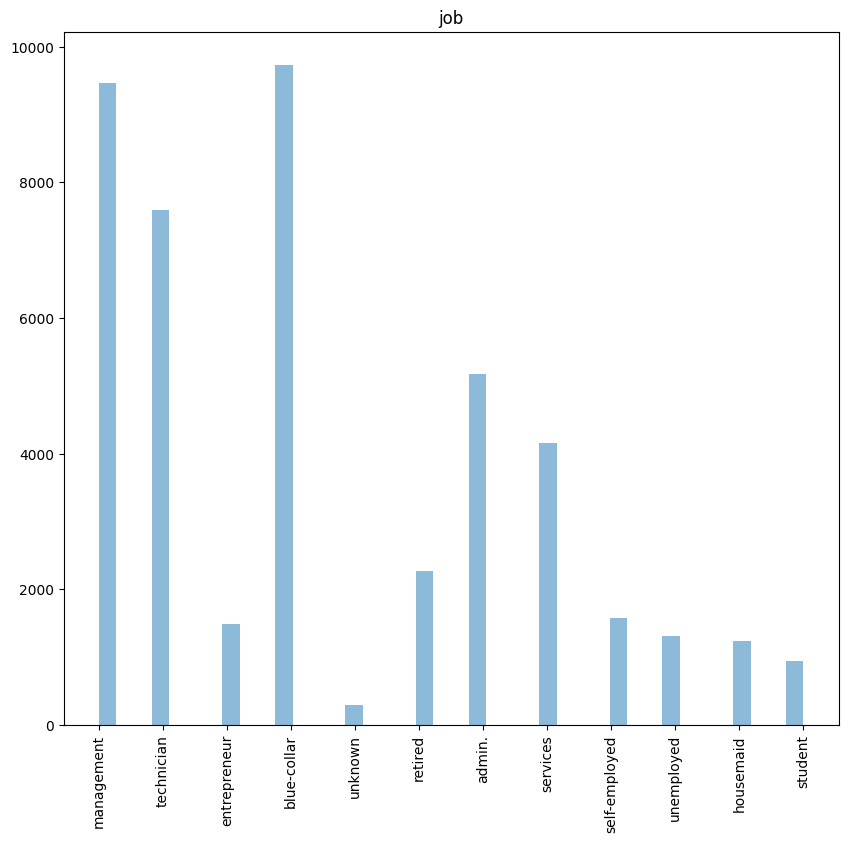

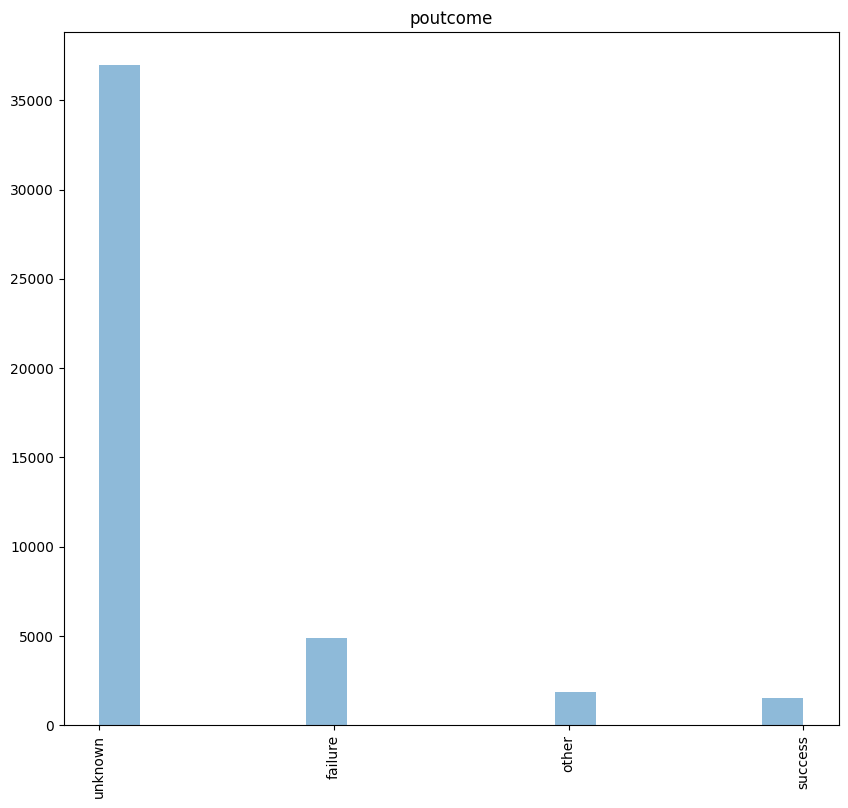

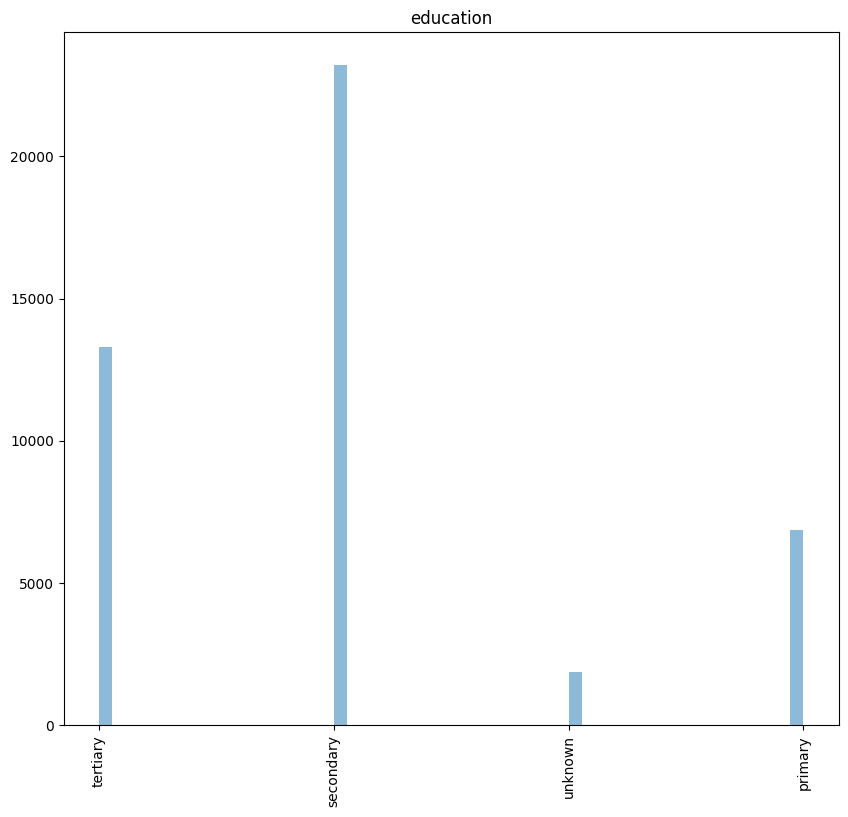

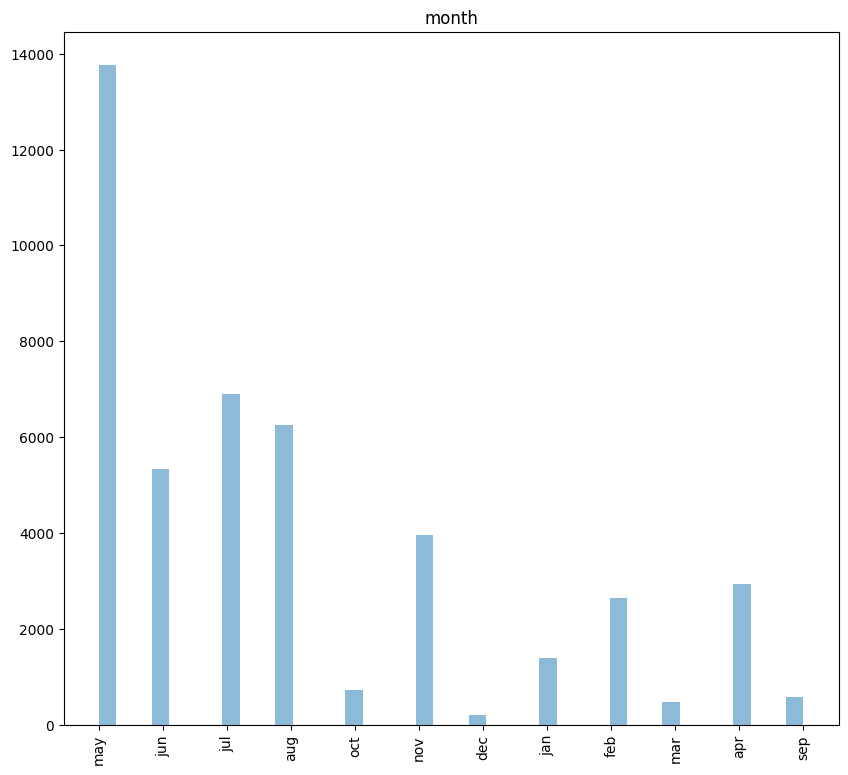

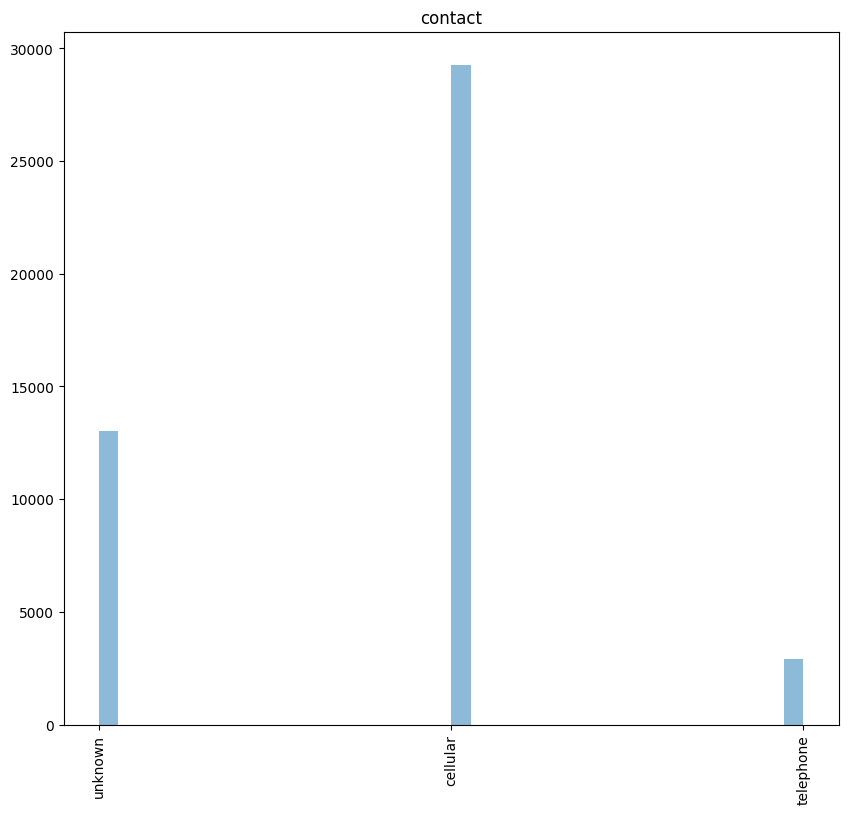

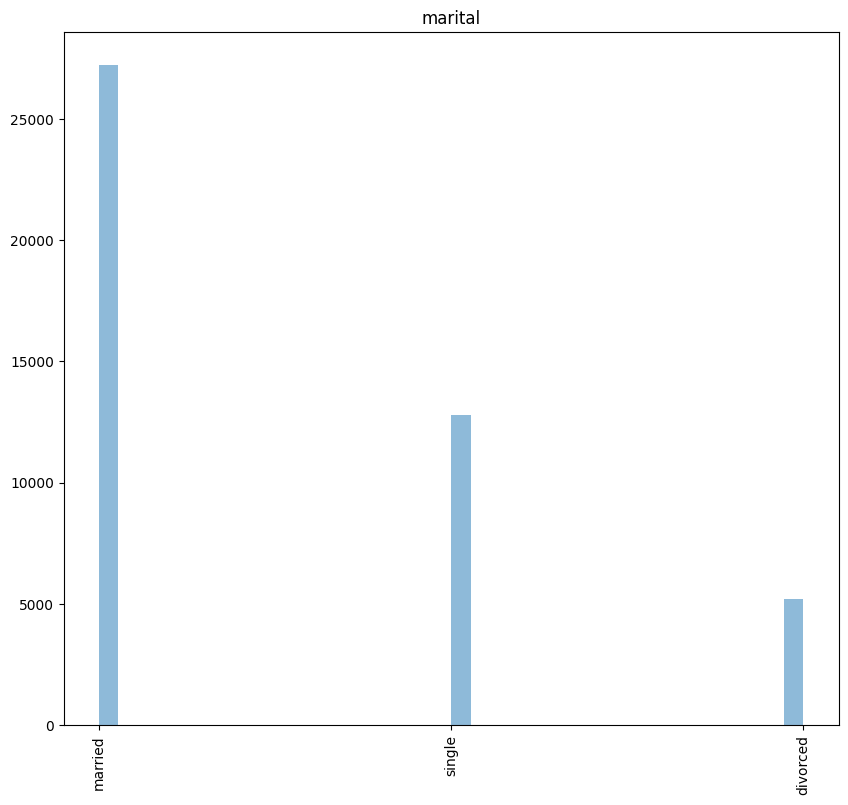

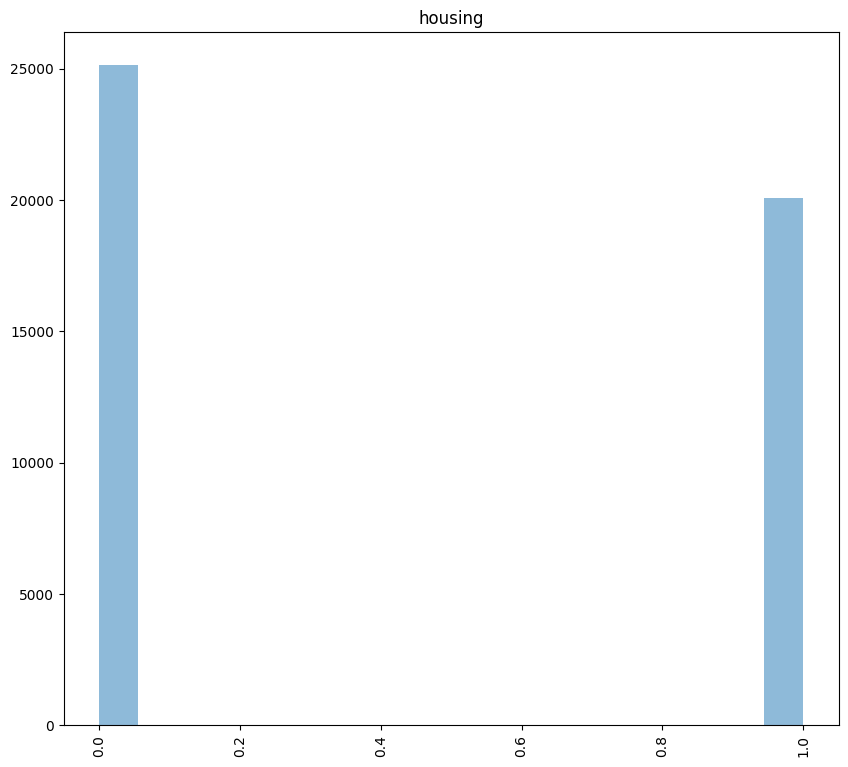

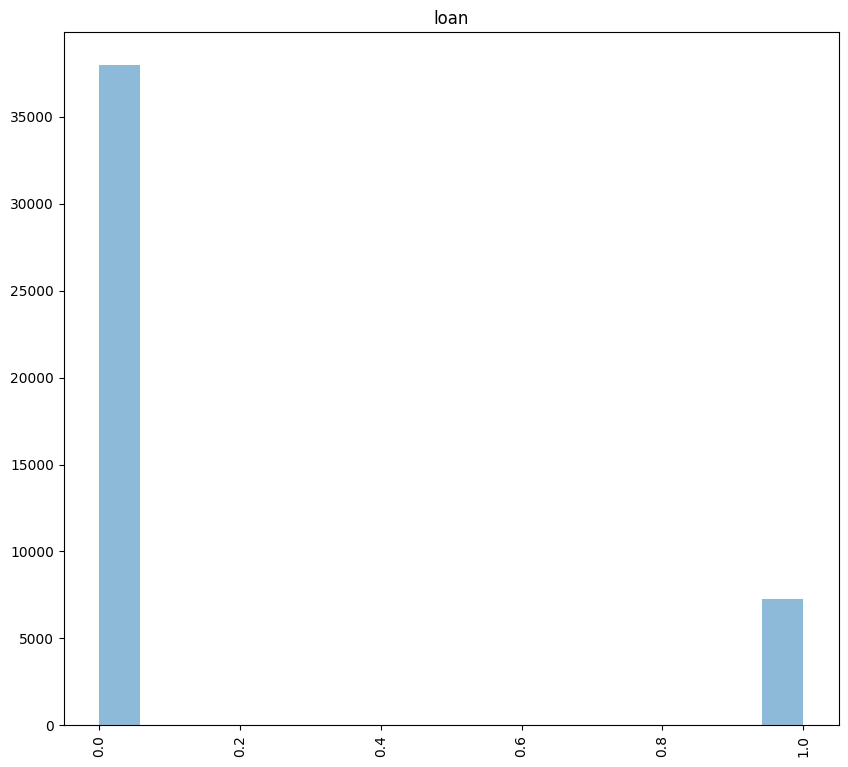

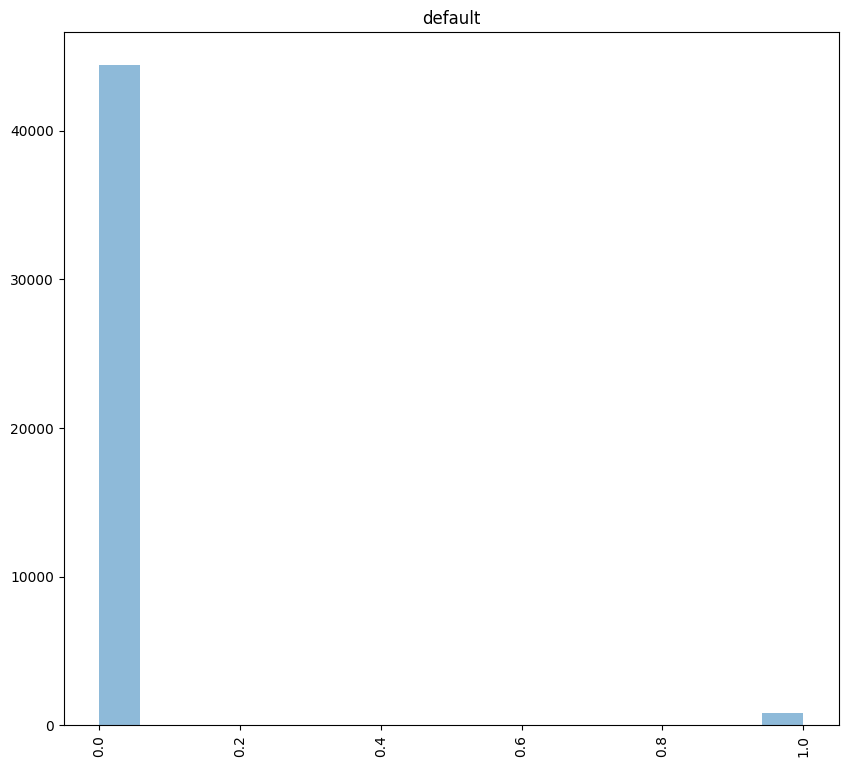

In [72]:
# x = 142
for i, col in enumerate(cat_cols):    
    try:
        plt.figure(figsize=(10,9))
        # plt.subplot(1,len(cat_cols),i)
        plt.hist(df[col], alpha = 0.5, bins="auto")
        plt.title(col)
        plt.xticks(rotation = 90)
        plt.show()

    except Exception as e:
        print(e,col)


In [74]:
con_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


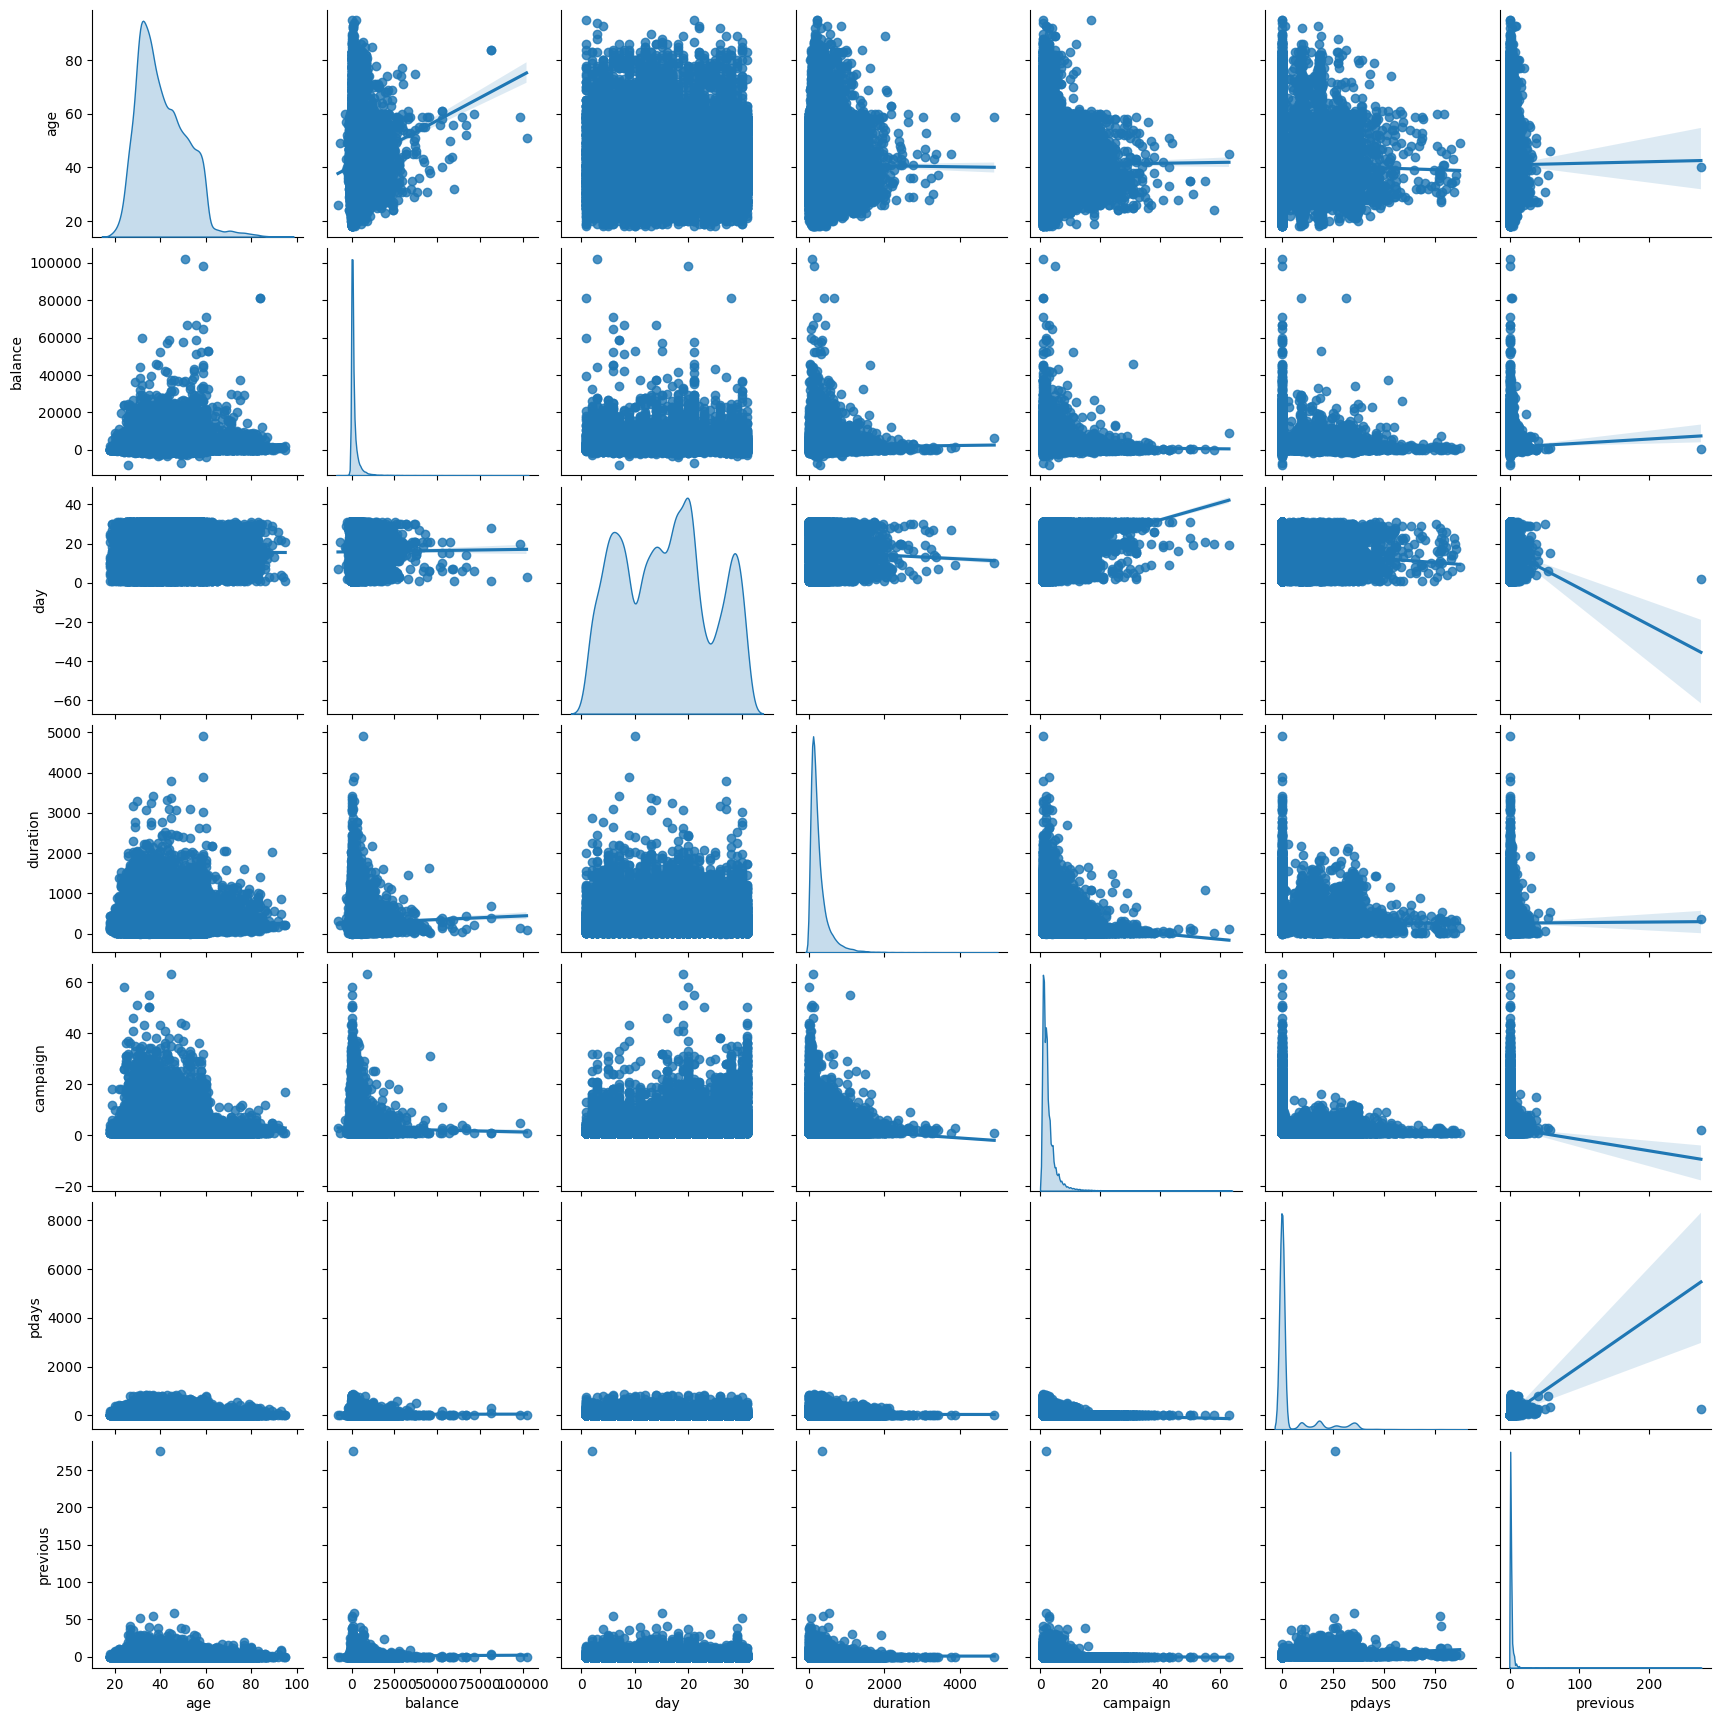

In [75]:
sns.pairplot(df[con_cols],kind='reg',diag_kind='kde')
plt.show()

Lets find out if there are any outliers

In [81]:
con_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

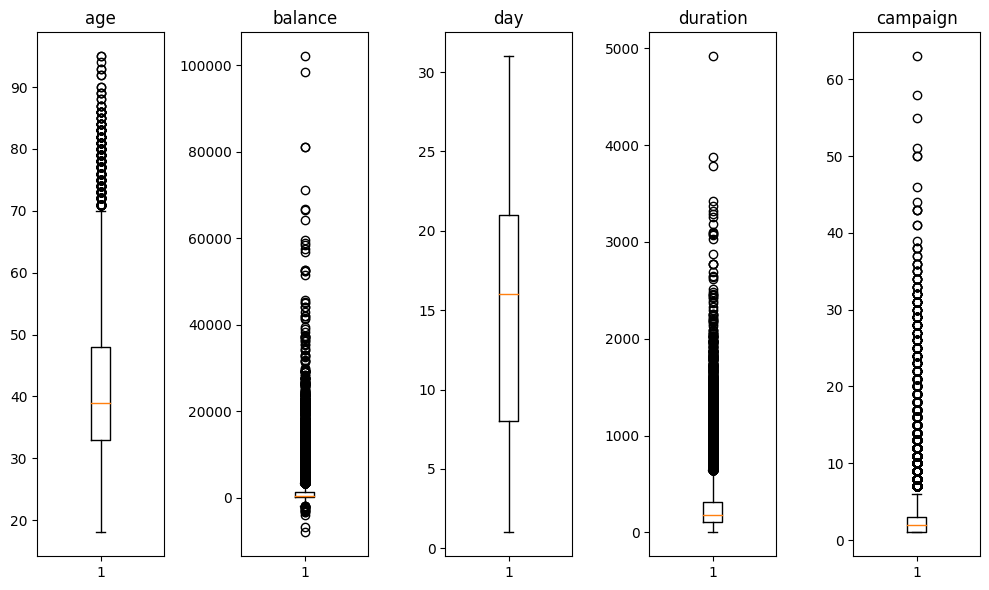

In [98]:
plt.figure(figsize=(10,6))
for i, col in enumerate(con_cols[:-2],1):
    plt.subplot(1,len(con_cols) -2,i)
    plt.boxplot(df[col])
    # plt.yticks(rotation = 90)
    plt.title(col)
plt.tight_layout()
plt.show()

In [99]:
df.shape

(45211, 17)

In [ ]:
df["pdays"].value_counts()/df.shape[0]

pdays
-1      0.817367
 182    0.003694
 92     0.003251
 183    0.002787
 91     0.002787
          ...   
 551    0.000022
 595    0.000022
 648    0.000022
 452    0.000022
 449    0.000022
Name: count, Length: 559, dtype: float64

In [90]:
df['previous'].value_counts()/df.shape[0]

previous
0      0.817367
1      0.061313
2      0.046582
3      0.025259
4      0.015793
5      0.010152
6      0.006127
7      0.004534
8      0.002853
9      0.002035
10     0.001482
11     0.001438
12     0.000973
13     0.000841
15     0.000442
14     0.000420
17     0.000332
16     0.000288
19     0.000243
23     0.000177
20     0.000177
18     0.000133
22     0.000133
24     0.000111
27     0.000111
29     0.000088
21     0.000088
25     0.000088
30     0.000066
26     0.000044
37     0.000044
28     0.000044
38     0.000044
51     0.000022
275    0.000022
58     0.000022
32     0.000022
40     0.000022
55     0.000022
35     0.000022
41     0.000022
Name: count, dtype: float64

### Splitting the data in test and train

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Encoding and Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [27]:
x_train[con_cols] = sc.fit_transform(x_train[con_cols])
x_test[con_cols] = sc.fit_transform(x_test[con_cols])


In [28]:
x_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3344,0.006515,blue-collar,married,primary,0,-0.169381,0,0,unknown,-0.098218,may,-0.719756,-0.565886,-0.411364,-0.244772,unknown
17965,0.759937,technician,married,primary,0,0.017848,0,0,cellular,1.703422,jul,0.047138,-0.245389,-0.411364,-0.244772,unknown
18299,0.100693,admin.,married,secondary,0,0.820681,1,0,cellular,1.823532,jul,-0.493970,0.395606,-0.411364,-0.244772,unknown
10221,-0.370196,management,single,tertiary,0,-0.489588,0,0,unknown,-0.578656,jun,0.459781,2.639088,-0.411364,-0.244772,unknown
32192,1.419181,blue-collar,married,primary,0,0.706889,1,0,cellular,-0.098218,apr,0.027674,-0.245389,-0.411364,-0.244772,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.289048,housemaid,single,primary,0,-0.099915,1,0,unknown,0.262110,jun,7.147714,-0.565886,-0.411364,-0.244772,unknown
44732,-1.688684,student,single,tertiary,0,-0.282181,1,0,cellular,-0.938984,sep,-0.182541,-0.565886,0.517649,0.177056,failure
38158,-0.652729,technician,divorced,tertiary,0,-0.014570,0,0,cellular,-0.098218,may,-0.069648,-0.565886,-0.411364,-0.244772,unknown
860,-0.746907,retired,married,secondary,0,-0.395643,1,0,unknown,-1.059093,may,-0.567934,-0.565886,-0.411364,-0.244772,unknown


In [29]:
x_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3776,-0.090182,blue-collar,married,secondary,0,-0.251495,0,0,unknown,0.028748,may,-0.274013,-0.584037,-0.411810,-0.288514,unknown
9928,0.568933,services,single,secondary,0,0.727425,1,0,unknown,-0.813735,jun,-0.693205,-0.251557,-0.411810,-0.288514,unknown
33409,-1.502571,student,single,tertiary,0,-0.264914,0,0,cellular,0.510167,apr,-0.143256,-0.584037,-0.411810,-0.288514,unknown
31885,0.098137,management,married,tertiary,0,0.129657,1,0,cellular,-0.813735,apr,0.183637,-0.584037,2.951021,0.208445,failure
15738,1.416366,management,married,tertiary,0,-0.367471,1,1,cellular,0.630521,jul,-0.547065,-0.251557,-0.411810,-0.288514,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13353,0.568933,management,married,tertiary,0,0.167038,1,0,cellular,-0.934090,jul,-0.393233,-0.584037,-0.411810,-0.288514,unknown
38732,-0.843456,blue-collar,single,secondary,0,-0.367471,0,0,cellular,-0.091607,may,1.648885,0.080923,-0.411810,-0.288514,unknown
5654,1.039729,admin.,divorced,secondary,0,-0.436800,0,0,unknown,1.232295,may,-0.220172,-0.584037,-0.411810,-0.288514,unknown
3779,-0.090182,admin.,divorced,secondary,0,-0.186639,0,1,unknown,0.028748,may,-0.354775,-0.251557,-0.411810,-0.288514,unknown


In [30]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()

In [31]:
for cols in x_train[cat_cols].columns:
    oe_train = pd.DataFrame(oe.fit_transform(x_train[cat_cols]).toarray(),index=x_train.index)
    oe_test = pd.DataFrame(oe.transform(x_test[cat_cols]).toarray(),index=x_test.index)

    # cols

In [32]:
oe_train

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
3344,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
17965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
18299,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
10221,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
32192,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
44732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
38158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
860,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [33]:
oe_test

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
3776,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
33409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
31885,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
15738,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13353,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
38732,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
5654,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3779,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [34]:
df.shape

(45211, 17)

In [35]:
oe_train.shape[0]+oe_test.shape[0]

45211

Lets see how the final train and test turns out

In [36]:
train_final = pd.concat([oe_train,x_train[con_cols]],axis=1)
test_final = pd.concat([oe_test,x_test[con_cols]],axis = 1)

In [37]:
train_final

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,age,balance,day,duration,campaign,pdays,previous
3344,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.006515,-0.169381,-0.098218,-0.719756,-0.565886,-0.411364,-0.244772
17965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.759937,0.017848,1.703422,0.047138,-0.245389,-0.411364,-0.244772
18299,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.100693,0.820681,1.823532,-0.493970,0.395606,-0.411364,-0.244772
10221,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.370196,-0.489588,-0.578656,0.459781,2.639088,-0.411364,-0.244772
32192,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.419181,0.706889,-0.098218,0.027674,-0.245389,-0.411364,-0.244772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.289048,-0.099915,0.262110,7.147714,-0.565886,-0.411364,-0.244772
44732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-1.688684,-0.282181,-0.938984,-0.182541,-0.565886,0.517649,0.177056
38158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,-0.652729,-0.014570,-0.098218,-0.069648,-0.565886,-0.411364,-0.244772
860,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.746907,-0.395643,-1.059093,-0.567934,-0.565886,-0.411364,-0.244772


### Lets train the model

In [38]:
from sklearn.linear_model import LogisticRegression
logreg  = LogisticRegression()

In [39]:
train_final.columns = train_final.columns.astype(str)
test_final.columns = test_final.columns.astype(str)

logreg.fit(train_final,y_train)

/home/its_relative/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/home/its_relative/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred = logreg.predict(test_final)

In [41]:
# checking the shape so that only 1-D array is sent in dataframe
print(y_pred.shape)
print(y_test.shape)
# so clearly y_test shape should be changed to (9043,) just like y_pred

(9043,)
(9043, 1)


In [42]:
check_df = pd.DataFrame({"pred":y_pred,"actual":np.array(y_test).reshape(-1)})

Putting the actual and predictions side by side to get a feeling of the predictions

In [43]:
check_df

,pred,actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
9038,0,0
9039,0,1
9040,0,0
9041,0,0


### Evaluation time

In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [45]:
score_dict = {}
for scores in [accuracy_score,precision_score,recall_score,f1_score]:
    acc = scores(y_test,y_pred)
    score_dict[scores.__name__] = acc

0.89 accuracy is pretty good the recall and precision_score might not be balanced but look good

In [46]:
score_dict

{'accuracy_score': 0.8984850160345018,
 'precision_score': 0.6536412078152753,
 'recall_score': 0.3373052245646196,
 'f1_score': 0.4449818621523579}